# Flight delays greater than 10 minutes

In this file I am going to create a prediction model in order to predict which is the probability that the departure delays are greater than 10 minutes depending on the weather conditions. 

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

### Cleaning operations

In [2]:
flights = pd.read_csv("../cleaned_data/airlines_weather_imp.csv")

In [3]:
flights.shape

(291851, 20)

In [4]:
#first of all I am going to delete the early departure since I want explicitly to analyse the delays
#higher or lower than 10 minutes
flights = flights.loc[flights.dep_delay >= 0].copy()

In [5]:
flights.shape

(120955, 20)

In [6]:
flights["dep_delay_10"] = np.where(flights.dep_delay <= 10, 0, 1)
(
flights.drop(columns = ["dep_delay", "flight", "tailnum", "arr_delay",
                        "time_hour", "wind_gust", "day", "wind_speed_group", "visib_group", "airline",
                        "carrier", "dest", "month"], inplace = True)
)

In [7]:
flights.describe

<bound method NDFrame.describe of        origin  air_time  distance    wind_dir  wind_speed  visib  hour  \
0         EWR     148.0      1085   10.000000     8.05546   10.0    21   
20        JFK     190.0      1598  360.000000     8.05546   10.0    17   
28        JFK     293.0      2153  350.000000    17.26170   10.0     6   
33        EWR     335.0      2565  350.000000    16.11092   10.0     6   
37        JFK      83.0       541  350.000000    17.26170   10.0     6   
...       ...       ...       ...         ...         ...    ...   ...   
291831    JFK     130.0       944  330.833333    15.53553   10.0    21   
291843    EWR     129.0       937  330.000000    16.11092   10.0    21   
291848    LGA     213.0      1620  340.000000    13.80936   10.0    22   
291849    JFK      37.0       187  330.000000    16.11092   10.0    23   
291850    JFK      48.0       266  340.000000    14.96014   10.0    22   

        dep_delay_10  
0                  1  
20                 1  
28      

In [8]:
flights.isna().sum()

origin            0
air_time        656
distance          0
wind_dir          0
wind_speed        0
visib             0
hour              0
dep_delay_10      0
dtype: int64

In [9]:
#since I am going to create a prediction model I must delete all the NAs
flights.dropna(inplace = True)
flights.isna().sum()
flights.shape

(120299, 8)

In [10]:
ProfileReport(flights)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
flights

origin  air_time  distance    wind_dir  wind_speed  visib  hour  \
0         EWR     148.0      1085   10.000000     8.05546   10.0    21   
20        JFK     190.0      1598  360.000000     8.05546   10.0    17   
28        JFK     293.0      2153  350.000000    17.26170   10.0     6   
33        EWR     335.0      2565  350.000000    16.11092   10.0     6   
37        JFK      83.0       541  350.000000    17.26170   10.0     6   
...       ...       ...       ...         ...         ...    ...   ...   
291831    JFK     130.0       944  330.833333    15.53553   10.0    21   
291843    EWR     129.0       937  330.000000    16.11092   10.0    21   
291848    LGA     213.0      1620  340.000000    13.80936   10.0    22   
291849    JFK      37.0       187  330.000000    16.11092   10.0    23   
291850    JFK      48.0       266  340.000000    14.96014   10.0    22   

        dep_delay_10  
0                  1  
20                 1  
28                 0  
33                 1  
37                 0  
...              ...  
291831             0  
291843             0  
291848             0  
291849             0  
291850             1  

[120299 rows x 8 columns]

In [12]:
# I am going to create dummy variables for the categorical columns
flights = pd.get_dummies(flights, drop_first = True)
flights.head()

air_time  distance  wind_dir  wind_speed  visib  hour  dep_delay_10  \
0      148.0      1085      10.0     8.05546   10.0    21             1   
20     190.0      1598     360.0     8.05546   10.0    17             1   
28     293.0      2153     350.0    17.26170   10.0     6             0   
33     335.0      2565     350.0    16.11092   10.0     6             1   
37      83.0       541     350.0    17.26170   10.0     6             0   

    origin_JFK  origin_LGA  
0            0           0  
20           1           0  
28           1           0  
33           0           0  
37           1           0

In [49]:
#Here I set my predictors and response variables.

delay_pred = flights.drop(columns = "dep_delay_10")

delay_resp = flights["dep_delay_10"]

In [50]:
#Now I am going to split the dataset in training and testing set
from sklearn.model_selection import train_test_split

In [51]:
delay_pred_train, delay_pred_test, delay_resp_train, delay_resp_test = (
    train_test_split(
        delay_pred,
        delay_resp,
        test_size = 0.2,
        random_state = 3
    )
)

#### Decision Tree

In [36]:
from sklearn import tree

In [37]:
model = tree.DecisionTreeClassifier()
model.fit(delay_pred_train, delay_resp_train)

DecisionTreeClassifier()

In [ ]:
#tree.plot_tree(model)

In [86]:
#very long time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, delay_pred_train, delay_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.582206842388642

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model_3 = RandomForestClassifier(n_estimators = 50)

# train the model on the training data
model_3.fit(delay_pred_train, delay_resp_train)

RandomForestClassifier(n_estimators=50)

In [33]:
#very long time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_3, delay_pred_train, delay_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.6276041641021973

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [57]:
%matplotlib inline

[Text(0.5, 0.875, 'hour <= 13.5\ngini = 0.471\nsamples = 60756\nvalue = [36457, 59782]\nclass = 1'),
 Text(0.25, 0.625, 'visib <= 9.5\ngini = 0.5\nsamples = 22628\nvalue = [17860, 17998]\nclass = 1'),
 Text(0.125, 0.375, 'distance <= 654.0\ngini = 0.495\nsamples = 2945\nvalue = [2105, 2551]\nclass = 1'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'wind_speed <= 18.769\ngini = 0.5\nsamples = 19683\nvalue = [15755, 15447]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'visib <= 9.5\ngini = 0.426\nsamples = 38128\nvalue = [18597, 41784]\nclass = 1'),
 Text(0.625, 0.375, 'distance <= 1087.0\ngini = 0.376\nsamples = 7124\nvalue = [2841, 8485]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'hour <= 18.5\ngini = 0.436\nsamples = 31004\nvalue = [15756, 33299]\nclass = 1'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 

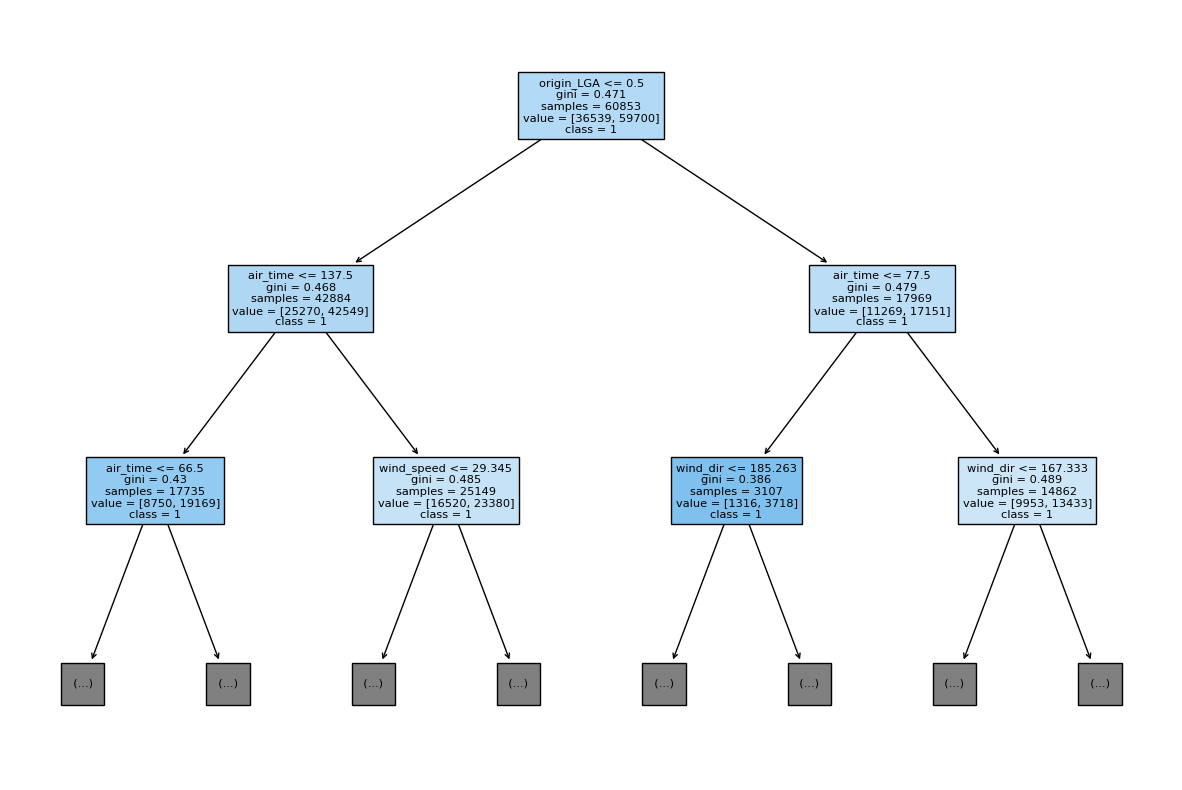

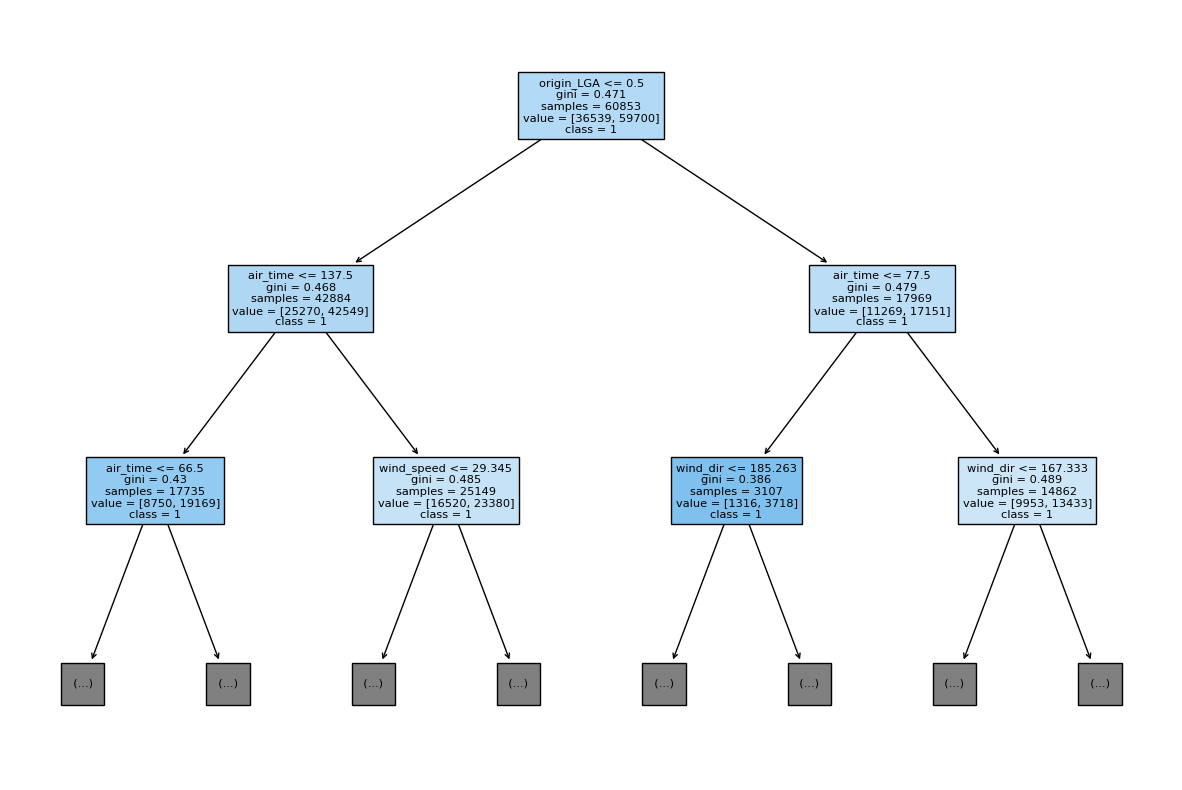

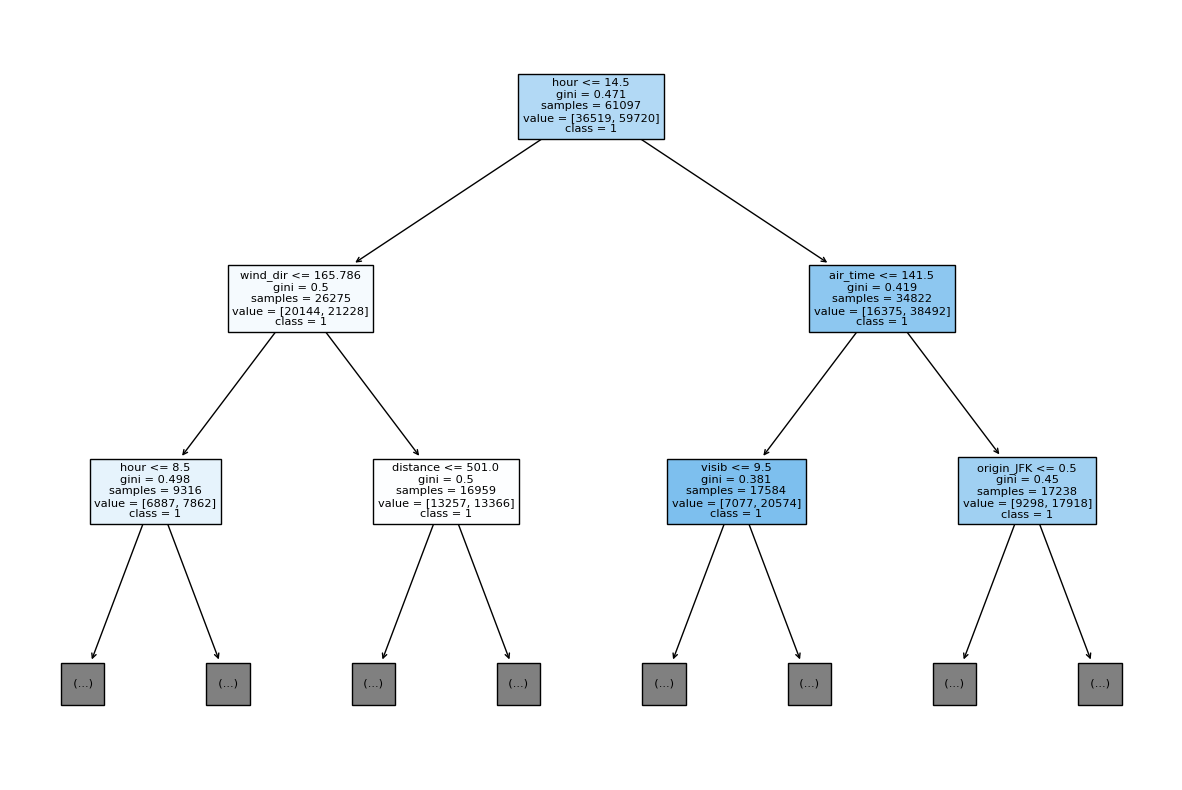

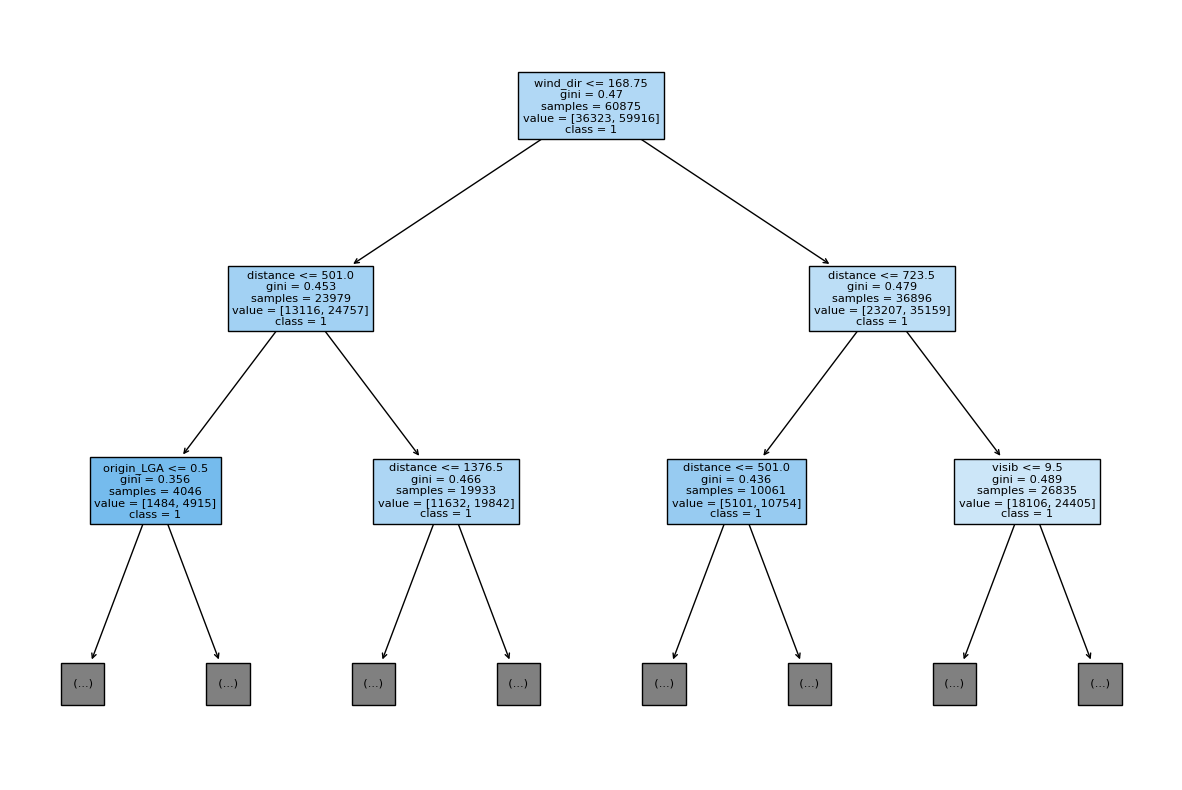

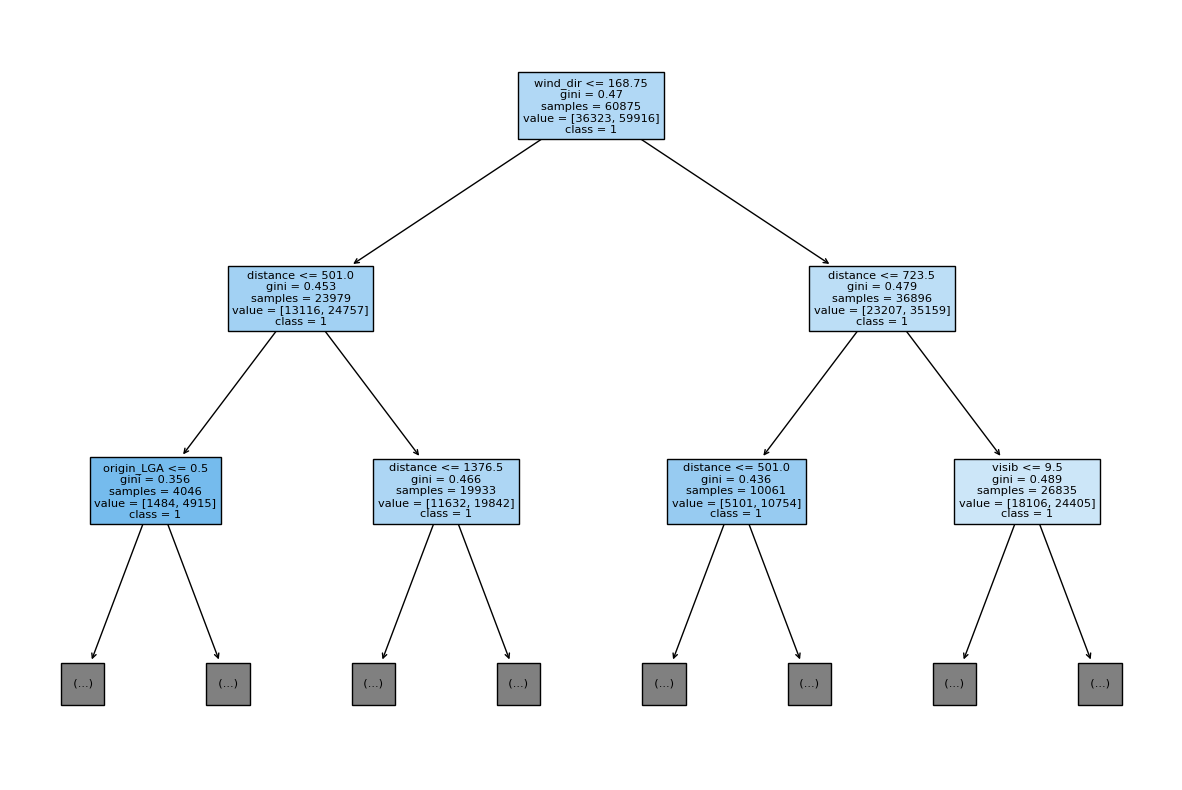

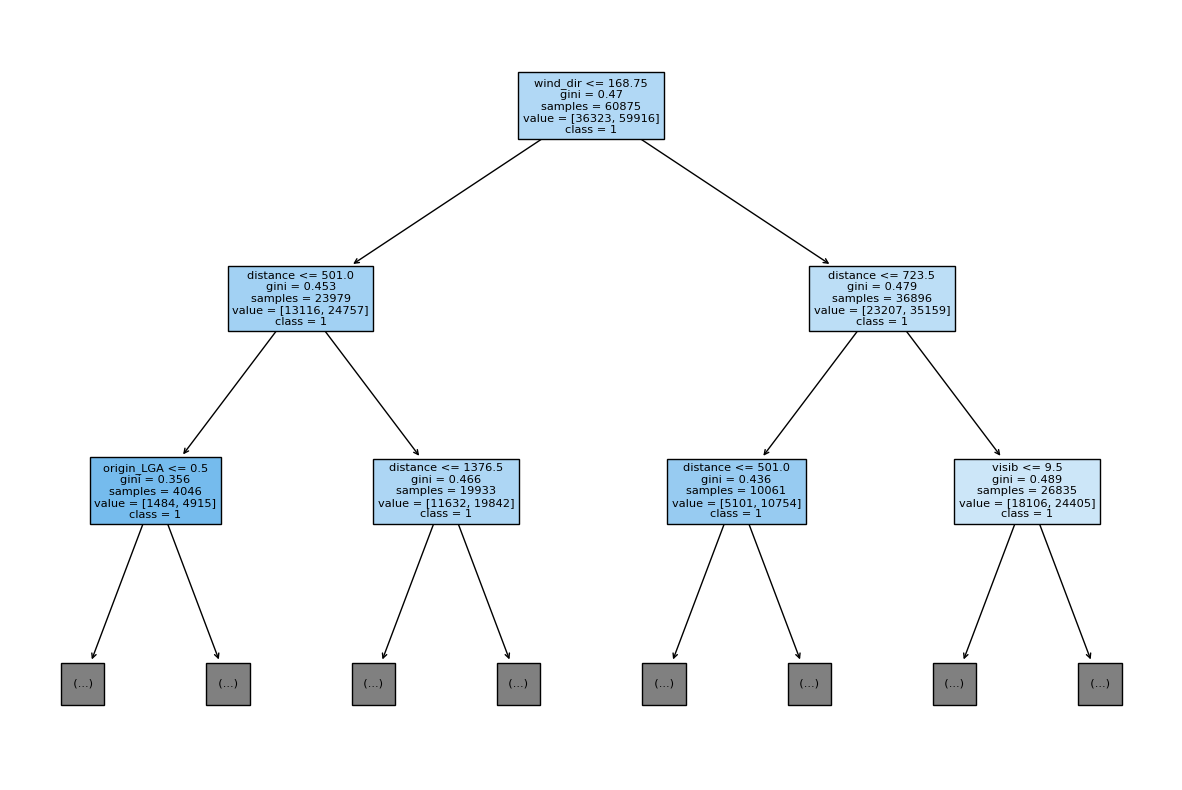

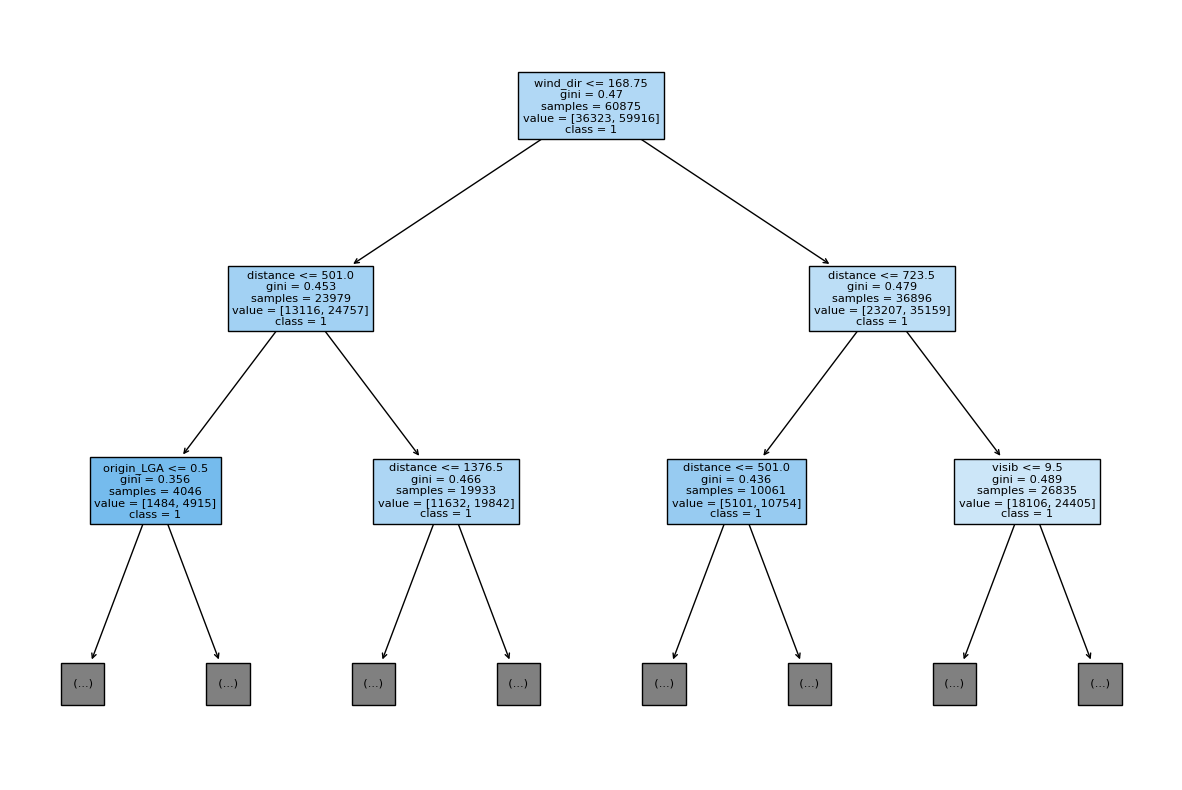

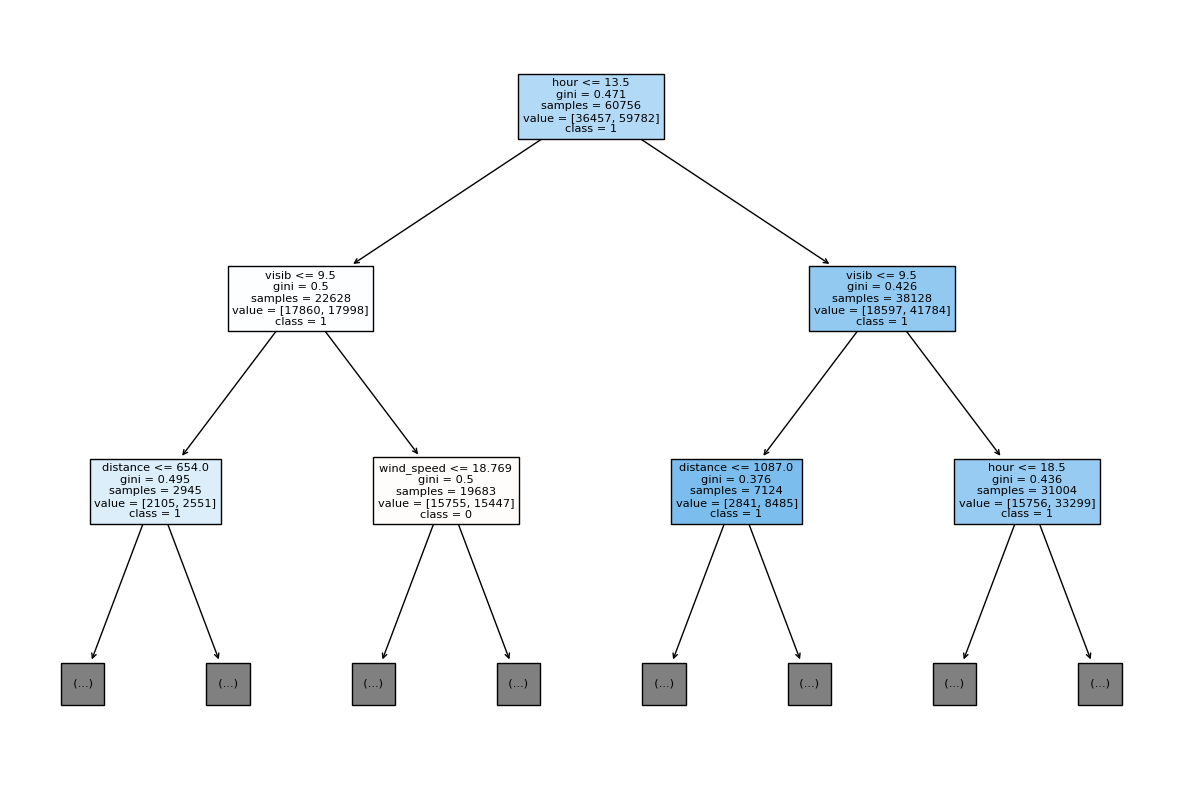

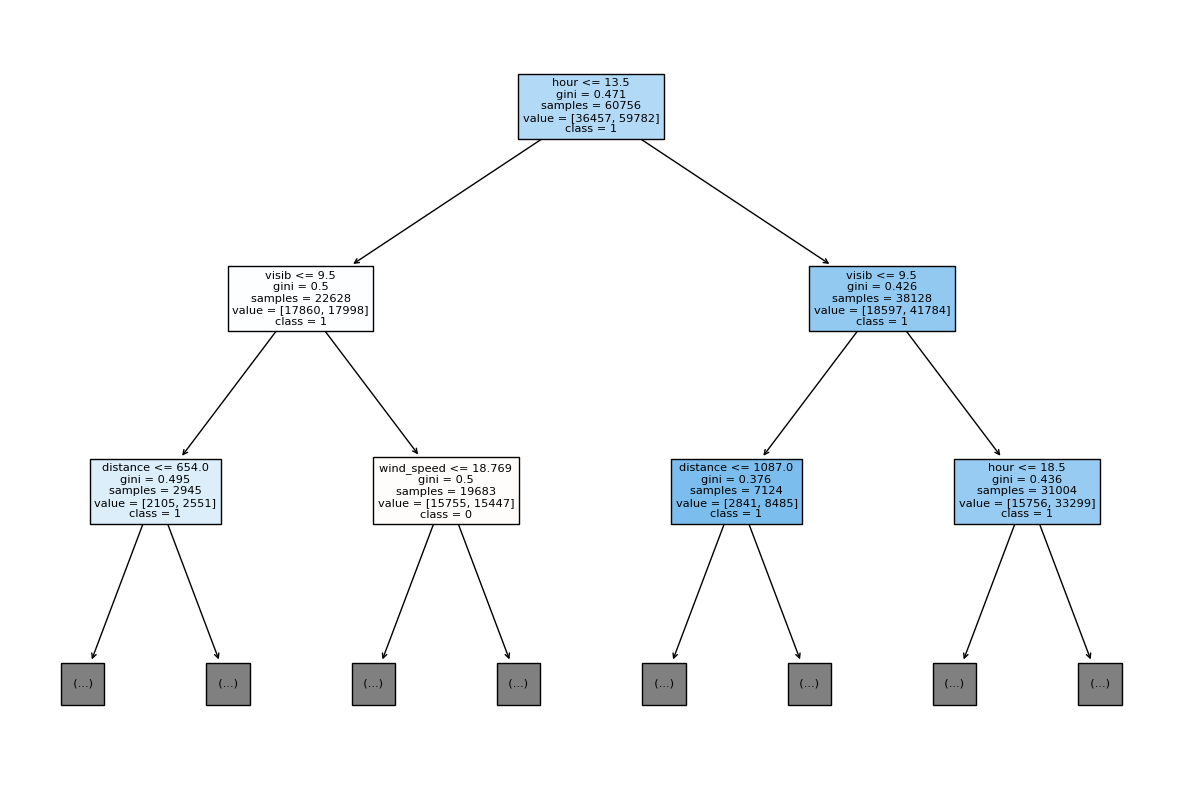

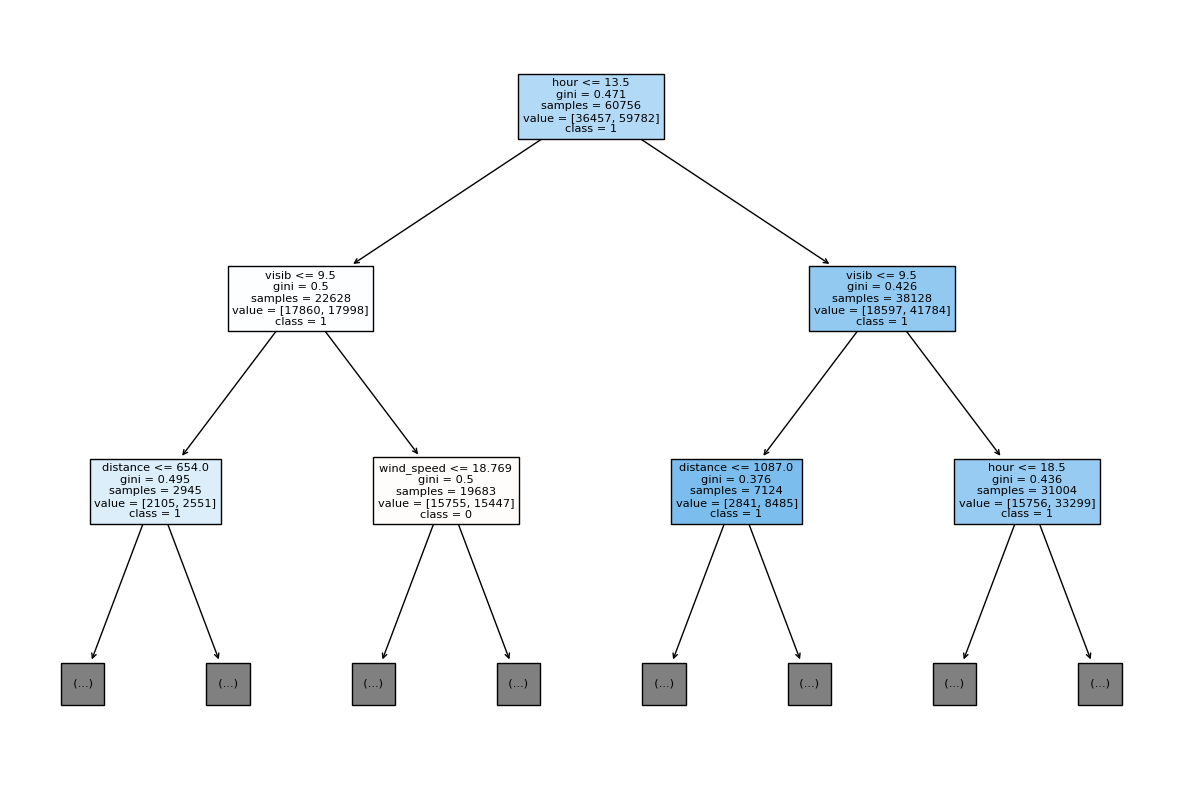

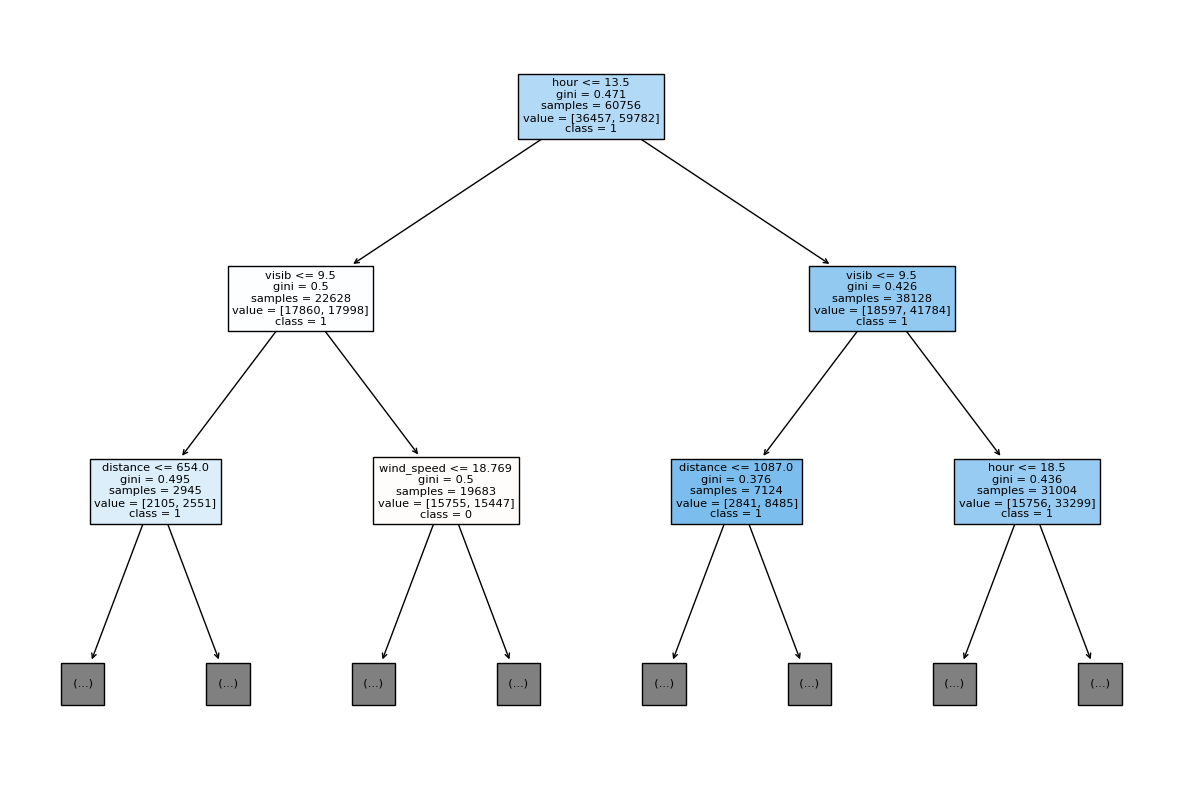

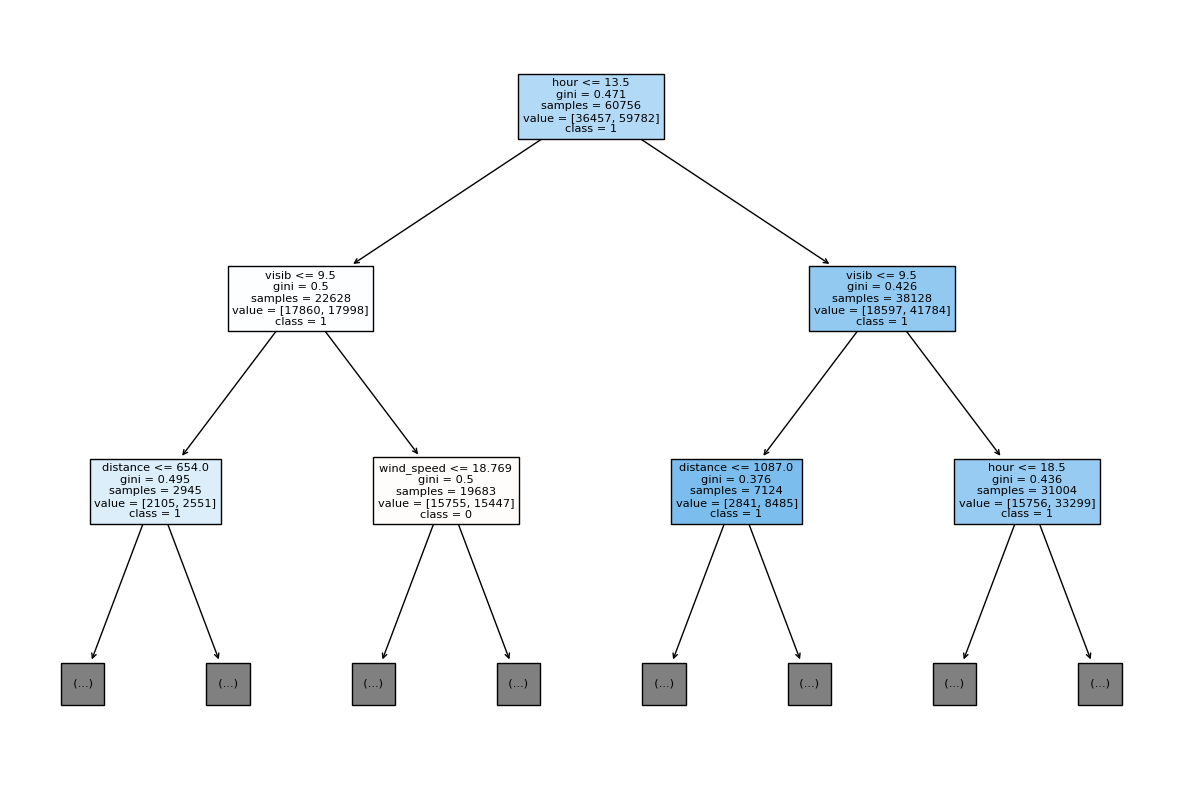

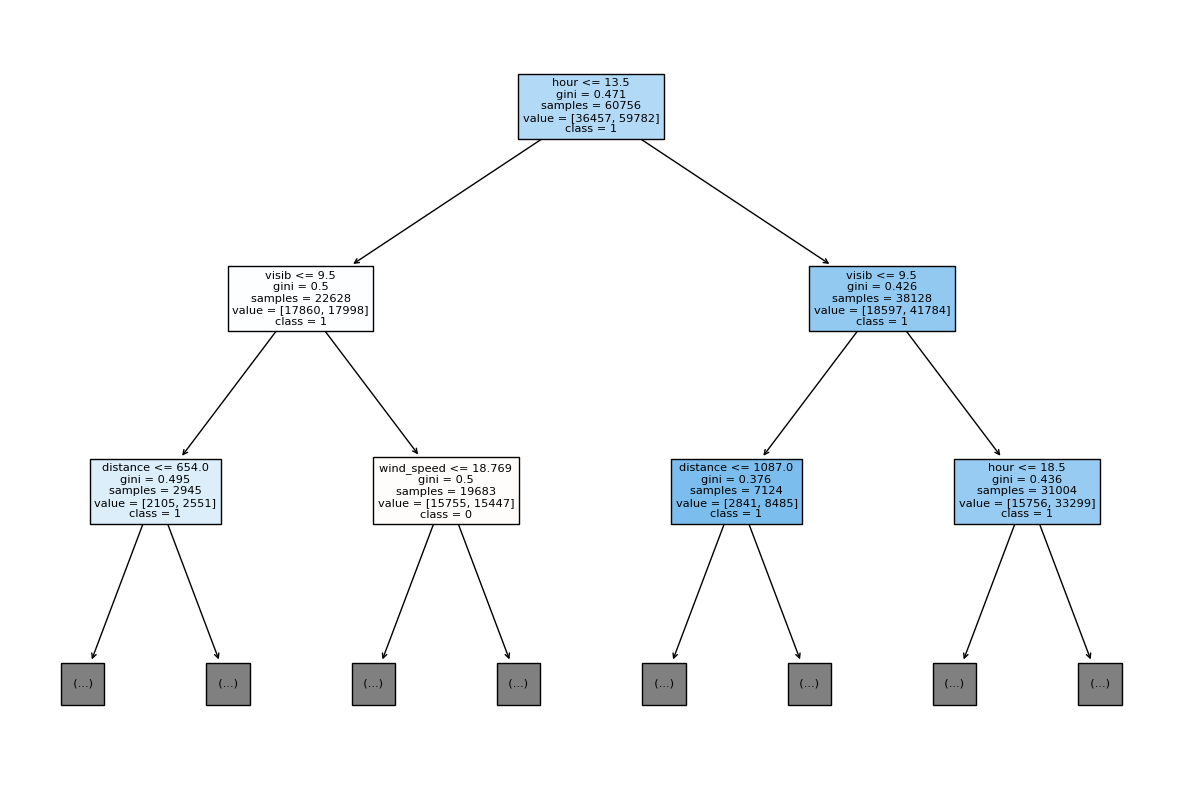

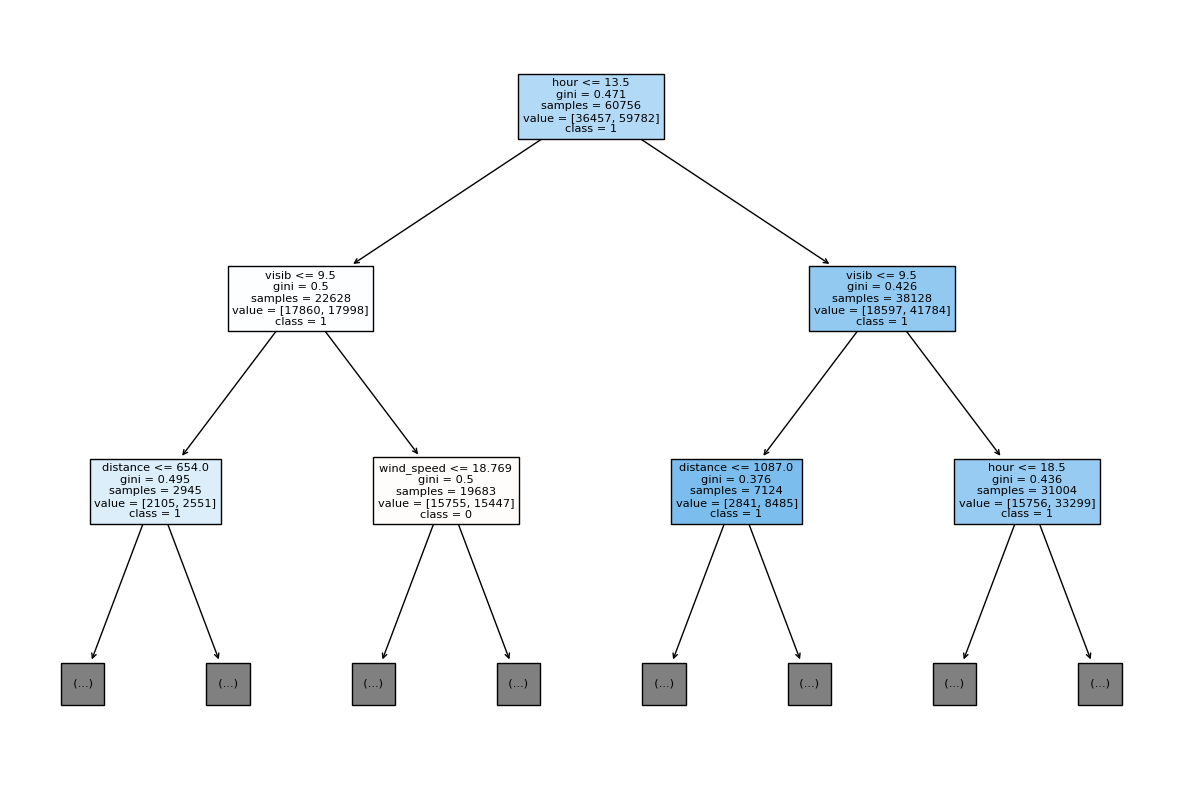

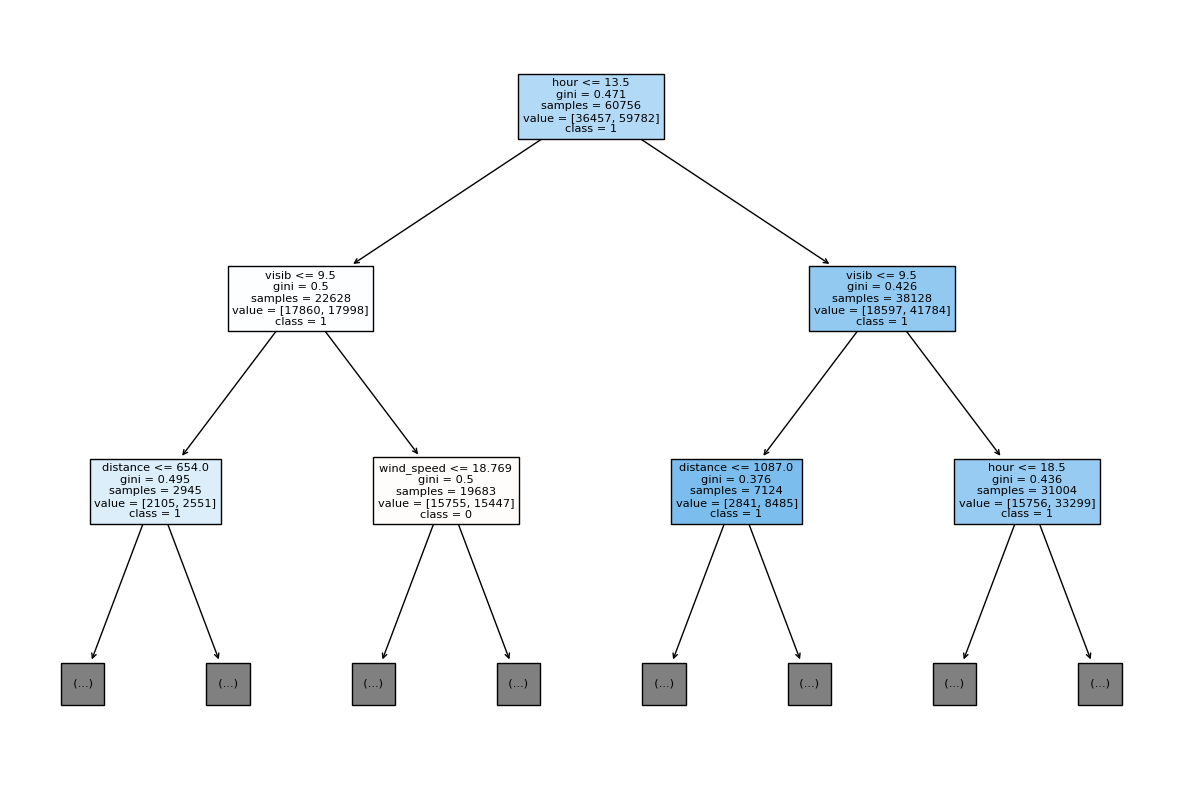

In [58]:
# create a list with names of predictors, and an array with target categories for plotting
delay_pred_names = list(delay_pred_test)
delay_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
tree = plot_tree(model_3.estimators_[0],
          max_depth = 2,
          feature_names = delay_pred_names,
          class_names = delay_resp_names, 
          filled=True)
tree

In [39]:
# Get numerical feature importances
importances = list(model_3.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(delay_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: air_time                                 Importance: 0.31
Variable: wind_dir                                 Importance: 0.19
Variable: wind_speed                               Importance: 0.16
Variable: distance                                 Importance: 0.15
Variable: hour                                     Importance: 0.13
Variable: visib                                    Importance: 0.03
Variable: origin_JFK                               Importance: 0.01
Variable: origin_LGA                               Importance: 0.01


#### Other methods for trees

In [18]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

In [38]:
delay_pred_names = list(delay_pred_test)
delay_resp_names = ['0', '1']

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = delay_pred_names,class_names=delay_resp_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

KeyboardInterrupt: 

In [40]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                                #feature_names=flights.feature_names, 
                                #class_names=flights.dep_delay_10,  
                                filled=True, rounded=True,  
                                special_characters=True) 

In [41]:
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [43]:
model_2 = LogisticRegression()
model_2.fit(delay_pred_train, delay_resp_train)
scores = cross_val_score(
    model_2, delay_pred_train, delay_resp_train, scoring='accuracy', cv=15
)
scores

C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.64822319, 0.64245636, 0.64027431, 0.63980673, 0.64837905,
       0.64588529, 0.63575436, 0.63076683, 0.64214464, 0.65180798,
       0.63700125, 0.64650873, 0.64292394, 0.64339152, 0.64271239])

In [44]:
print(model_2.score(delay_pred_train, delay_resp_train))
print(np.mean(scores))

0.64225521877825
0.6425357721570326


In [45]:
model_2.score(delay_pred_test, delay_resp_test)

0.642809642560266

In [46]:
pred_test = model_2.predict_proba(delay_pred_test)
pred_test

array([[0.2428272 , 0.7571728 ],
       [0.39023023, 0.60976977],
       [0.50642039, 0.49357961],
       ...,
       [0.29199587, 0.70800413],
       [0.26798528, 0.73201472],
       [0.39539417, 0.60460583]])

In [47]:
#I just want the probabilities of the positive outcome 
pred_test = pred_test[:, 1]
pred_test

array([0.7571728 , 0.60976977, 0.49357961, ..., 0.70800413, 0.73201472,
       0.60460583])

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = delay_resp_test, y_score = pred_test)

0.6501248375277131